   # Dynamic Price Momentum Indicator (DPMI)

Mathematical Formula: DPMI = ( Close Price - EMA ) / ATR

This indicator aims to predict the market momentum by considering the relative position of the close price to its EMA normalized by market volatility. The dynamic nature of the indicator adjusts to varying market conditions.

### Importing Libraries

In [198]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import datetime as dt

### Importing Stocks Dataset

In [199]:
start_date="2017-01-01"
end_date="2018-06-01"

In [200]:
stocks=["HDFCBANK.NS","KOTAKBANK.NS","ICICIBANK.NS"]

In [201]:
stock_data =  yf.download(stocks, start = start_date ,end= end_date)

[*********************100%%**********************]  3 of 3 completed


In [202]:
data = {}
for stock in stocks:
    data[stock] = yf.download(stock, start = start_date ,end= end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [203]:
def calculate_atr(data, period=14):
    # Calculate True Range (TR)
    data['High-Low'] = data['High'] - data['Low']
    data['High-PrevClose'] = abs(data['High'] - data['Close'].shift(1))
    data['Low-PrevClose'] = abs(data['Low'] - data['Close'].shift(1))
    
    data['TrueRange'] = data[['High-Low', 'High-PrevClose', 'Low-PrevClose']].max(axis=1)

    # Calculate ATR
    data['ATR'] = data['TrueRange'].ewm(span=period, adjust=False).mean()

    # Drop intermediate columns
    data.drop(['High-Low', 'High-PrevClose', 'Low-PrevClose', 'TrueRange'], axis=1, inplace=True)

    return data['ATR']

In [204]:
period=14
for stock in stocks:
    data[stock]['ATR']=calculate_atr(data[stock],period)
    data[stock]['ATR']

In [205]:
data['HDFCBANK.NS']

,Open,High,Low,Close,Adj Close,Volume,ATR
Date,,,,,,,
2017-01-02,604.724976,605.049988,596.025024,598.549988,570.104675,1854328,9.024963
2017-01-03,600.400024,600.974976,592.875000,594.950012,566.675781,1923750,8.901632
2017-01-04,594.924988,596.000000,591.900024,592.750000,564.580322,3483560,8.261411
2017-01-05,594.500000,597.250000,591.549988,593.099976,564.913696,3388192,7.919891
2017-01-06,595.049988,599.200012,594.099976,596.825012,568.461731,2762630,7.677244
...,...,...,...,...,...,...,...
2018-05-25,995.000000,1008.000000,994.950012,1004.349976,962.976013,2379794,14.954674
2018-05-28,1003.900024,1026.000000,1003.000000,1021.099976,979.036072,2551970,16.027384
2018-05-29,1019.000000,1026.349976,1014.400024,1016.299988,974.433777,1675622,15.483727


In [206]:
for stock in stocks:
    short_ema=15
    long_ema=30
    data[stock]['EMA_short'] = data[stock]['Close'].ewm(span=short_ema, adjust=False).mean()
    data[stock]['EMA_long'] = data[stock]['Close'].ewm(span=long_ema, adjust=False).mean()

In [207]:
for stock in stocks:
    data[stock]['DPMI'] = (data[stock]['Close'] - data[stock]['EMA_short']) / data[stock]['ATR']

In [208]:
data['KOTAKBANK.NS']

,Open,High,Low,Close,Adj Close,Volume,ATR,EMA_short,EMA_long,DPMI
Date,,,,,,,,,,
2017-01-02,720.000000,721.000000,708.250000,714.799988,712.233826,1206555,12.750000,714.799988,714.799988,0.000000
2017-01-03,714.950012,717.450012,707.150024,711.750000,709.194763,1381976,12.423332,714.418739,714.603214,-0.214817
2017-01-04,713.000000,713.000000,692.500000,695.599976,693.102783,4258608,13.500221,712.066394,713.377199,-1.219715
2017-01-05,702.849976,702.849976,696.200012,698.950012,696.440735,2180203,12.666858,710.426846,712.446413,-0.906052
2017-01-06,698.000000,718.500000,693.349976,716.849976,714.276428,3664687,14.331280,711.229737,712.730514,0.392166
...,...,...,...,...,...,...,...,...,...,...
2018-05-25,1277.949951,1306.849976,1272.500000,1295.849976,1292.006470,1065643,29.683473,1261.602974,1227.602629,1.153740
2018-05-28,1300.000000,1309.699951,1289.800049,1297.150024,1293.302490,1527809,28.378997,1266.046355,1232.089558,1.096010
2018-05-29,1297.099976,1300.900024,1278.449951,1284.250000,1280.440796,1094590,27.588473,1268.321811,1235.454748,0.577349


### Plotting Candlestick Chart and Observing Movement of the DPMI Indicator

In [209]:
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pyo.init_notebook_mode(connected=True)

In [210]:
for stock in stocks:
    fig=make_subplots(rows=3,cols=1,shared_xaxes=True,vertical_spacing=0.1,
                  subplot_titles=(stock,'DPMI','Volume'),row_width=[0.2,0.6,0.6])
    fig.add_trace(go.Candlestick(x=data[stock].index,open=data[stock]['Open'],high=data[stock]['High'],low=data[stock]['Low'],close=data[stock]['Close'],name='OHLC'))
    fig.add_trace(go.Scatter(x=data[stock].index,y=data[stock]['EMA_short'],marker_color="blue",name='EMA 15'),row=1,col=1)
    fig.add_trace(go.Scatter(x=data[stock].index,y=data[stock]['EMA_long'],marker_color="grey",name='EMA 30'),row=1,col=1)
    fig.add_trace(go.Bar(x=data[stock].index,y=data[stock]['Volume'],marker_color='red',showlegend=False),row=3,col=1)
    fig.add_trace(go.Scatter(x=data[stock].index,y=data[stock]['DPMI'],marker_color="yellow",name='DPMI'),row=2,col=1)
    fig.update_layout(
        title='Candlestick Graph',
        xaxis_tickfont_size=12,
        yaxis=dict(title='Price(Rs/share)',titlefont_size=14,tickfont_size=12),
        autosize=False,
        width=800,height=500,margin=dict(l=50,r=50,b=100,t=100,pad=5),
        paper_bgcolor='LightSteelblue'
    )
    fig.update(layout_xaxis_rangeslider_visible=False)
    fig.show()

## Trading Strategy
#### Entry and exit rules:
1) Buy Signal: When DPMI crosses above a predefined threshold (e.g., 1.5) and the market is in an uptrend (EMA with a longer period is below EMA with a shorter period), generate a buy signal.

2) Sell Signal: When DPMI crosses below a predefined threshold (e.g., -1.5) and the market is in a downtrend (EMA with a shorter period is below EMA with a longer period), generate a sell signal.

3) Exit Signal: Close the position when DPMI crosses back below the threshold for a buy position or above the threshold for a sell position.

This approach combines the momentum aspect captured by the EMA with a volatility normalization provided by ATR, resulting in a dynamic indicator that adapts to changing market conditions. Adjusting the threshold levels allows for customization based on the desired sensitivity of the trading signals.

In [211]:
def generate_trade_signals(data,buy_threshold,sell_threshold):
    signals=pd.DataFrame()
    signals['Price']=data['Adj Close']
    signals['DPMI']=data['DPMI']
    signals['EMA 15']=data['EMA_short']
    signals['EMA 30']=data['EMA_long']
    signals['signal']=np.select([(signals['DPMI'] > buy_threshold)&(data['EMA_short']>data['EMA_long']), (signals['DPMI'] < sell_threshold)&(data['EMA_short']<data['EMA_long'])], [1, -1], default = 0)
    signals['position'] = signals['signal'].diff()
    
    return signals

### Backtesting The Strategy

We backtest our strategy on a 5 year historical data of a given stock.

In [212]:
start_date1 = '2018-11-30'
end_date1 = '2023-12-15'
symbol = 'HINDUNILVR.NS'
data1 = yf.download(symbol,start=start_date1,end=end_date1)

[*********************100%%**********************]  1 of 1 completed


In [213]:
period=14
data1['ATR']=calculate_atr(data1,period)
data1['EMA_short'] = data1['Close'].ewm(span=short_ema, adjust=False).mean()
data1['EMA_long'] = data1['Close'].ewm(span=long_ema, adjust=False).mean()
data1['DPMI'] = (data1['Close'] - data1['EMA_short']) / data1['ATR']

In [214]:
buy_threshold = 2.0
sell_threshold = -2.0

In [215]:
trade_signals=generate_trade_signals(data1,buy_threshold,sell_threshold)
trade_signals.dropna(inplace = True)
trade_signals.tail(50)

,Price,DPMI,EMA 15,EMA 30,signal,position
Date,,,,,,
2023-10-03,2450.924316,-0.478781,2485.072468,2506.359066,0,0.0
2023-10-04,2489.590820,0.563089,2487.919672,2506.455261,0,0.0
2023-10-05,2501.205566,0.799851,2491.873469,2507.300086,0,0.0
2023-10-06,2481.202148,0.196849,2492.814273,2506.790397,0,0.0
2023-10-09,2493.015625,0.479576,2495.124995,2507.081342,0,0.0
2023-10-10,2497.879883,0.584226,2497.759365,2507.669640,0,0.0
2023-10-11,2537.787109,1.521561,2505.089432,2510.813528,0,0.0
2023-10-12,2538.382812,1.376168,2511.578253,2513.793300,0,0.0
2023-10-13,2550.742188,1.528064,2518.812215,2517.384052,0,0.0


### Plotting Trades Based on this Strategy

In [216]:
def plot_trades(signals):
  fig1 = plt.figure(figsize=(14,6))
  bx = fig1.add_subplot(111)
  l1 = bx.plot(signals['Price'], c='#4abdac')
  u1 = bx.plot(signals['Price'][signals['position'] == 1], lw=0, marker='^', markersize=7, c='g',alpha=0.9)
  u2, = bx.plot(signals['Price'][signals['position'] == -1], lw=0, marker='v', markersize=7, c='r',alpha=0.9)
  plt.title(symbol)
  plt.legend(['Price', 'Buy', 'Sell'])

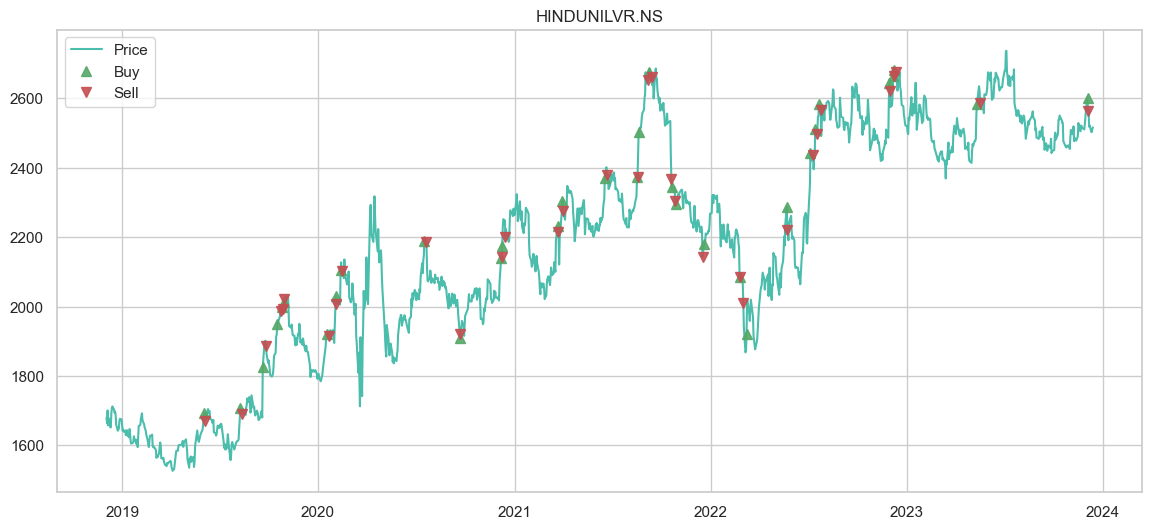

In [217]:
plot_trades(trade_signals)

## Portfolio Performance
Profit and Loss Calculation 

In [218]:
def pnl_calculation(signals):

  initial_capital = 100000

  # Shares to buy for each stock
  shares = initial_capital// (signals['Price'])
  

  #PnL for stock
  portfolio = pd.DataFrame()
  portfolio['holdings'] = signals['position'].cumsum() * signals['Price'] * shares
  portfolio['cash'] = initial_capital - (signals['position'] * signals['Price'] * shares).cumsum()
  portfolio['total'] = portfolio['holdings'] + portfolio['cash']
  portfolio['return'] = portfolio['total'].pct_change()
  portfolio=portfolio.dropna()

  return portfolio

In [219]:
portfolio = pnl_calculation(trade_signals)
portfolio.tail(50)

,holdings,cash,total,return
Date,,,,
2023-10-03,0.000000,106768.168823,106768.168823,0.000000
2023-10-04,0.000000,106768.168823,106768.168823,0.000000
2023-10-05,0.000000,106768.168823,106768.168823,0.000000
2023-10-06,0.000000,106768.168823,106768.168823,0.000000
2023-10-09,0.000000,106768.168823,106768.168823,0.000000
2023-10-10,0.000000,106768.168823,106768.168823,0.000000
2023-10-11,0.000000,106768.168823,106768.168823,0.000000
2023-10-12,0.000000,106768.168823,106768.168823,0.000000
2023-10-13,0.000000,106768.168823,106768.168823,0.000000


In [220]:
def plot_portfolio_value(portfolio):

  fig = plt.figure(figsize=(14,6),)
  ax = fig.add_subplot(111)
  l1, = ax.plot(portfolio['total'], c='g')
  ax.set_ylabel('Asset Value')
  ax.yaxis.labelpad=15
  ax.set_xlabel('Date')
  ax.xaxis.labelpad=15
  plt.title('Portfolio Performance PnL')
  plt.legend(['Total Portfolio Value'])

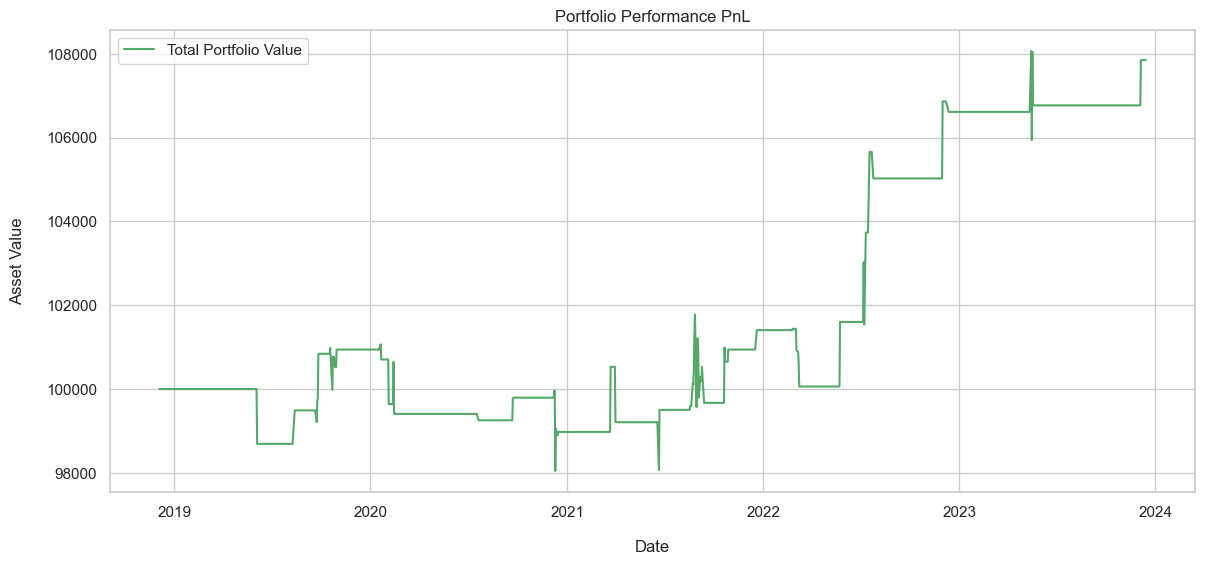

In [221]:
plot_portfolio_value(portfolio)

### Portfolio Returns

In [222]:
def calculate_cagr(portfolio):

  final_portfolio = portfolio['total'].iloc[-1]
  initial_portfolio = portfolio['total'].iloc[0]
  delta = len(portfolio.index)
  print('Number of trading days = ', delta)
  YEAR_DAYS = 252
  returns = (final_portfolio/initial_portfolio) ** (YEAR_DAYS/delta) - 1
  return returns

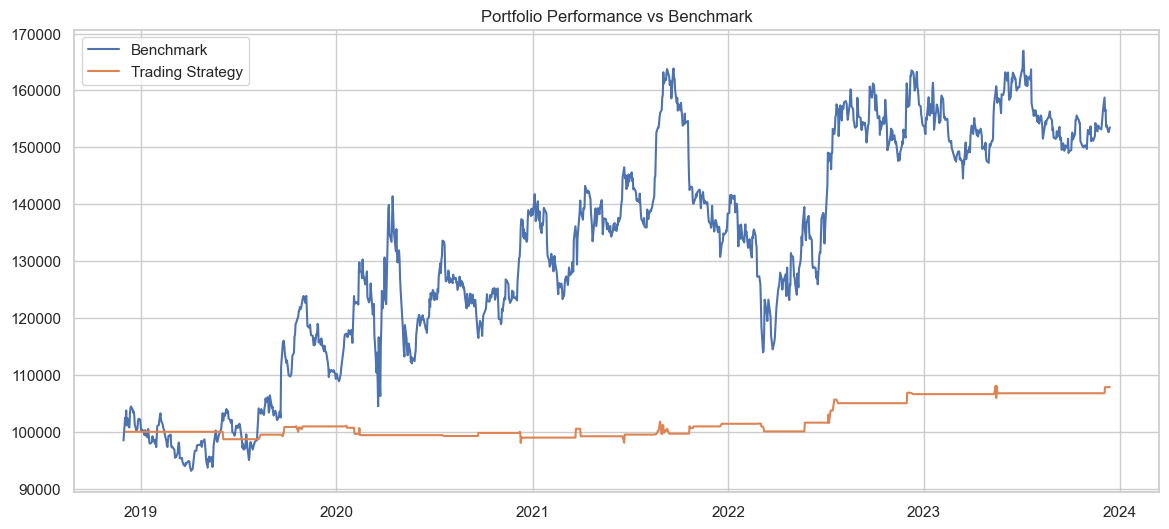

In [223]:
#Buy and hold results
df=data1['Adj Close']
shares= 100000//(df[0])
plt.figure(figsize = (14, 6))
plt.plot(df*shares)
plt.plot(portfolio['total'])
plt.title('Portfolio Performance vs Benchmark')
plt.legend(['Benchmark', 'Trading Strategy'])

In [224]:
print('CAGR = {:.3f}%' .format(calculate_cagr(portfolio) * 100))

Number of trading days =  1244
CAGR = 1.542%


In [225]:
cagr_bnh = (df.iloc[-1] / df[0])**(252/len(df)) - 1
print("CAGR if Buy and Hold:", np.round(cagr_bnh*100, 3), "%")

CAGR if Buy and Hold: 9.394 %
